In [1]:
import math
import random as r
import numpy as np
import scipy.stats as st
import scipy.integrate as _in
import matplotlib.pyplot as plt

In [2]:
# 3rd var
fxy = lambda x, y: (9 - math.sqrt(x**2 + y**2))/(63*math.pi)

# function params
a = -3
b = 3
fxy_max = 1 / (7 * math.pi)

N = 1_000_000

# f(x) = f(y)
def f_dx(x: float):
    return (-(x**2)*math.log(math.sqrt(-(x**2)+9)+3) + (x**2)*(math.log(-math.sqrt(-(x**2)+9)+3)) + (30*math.sqrt(-(x**2)+9)))/(126*math.pi)
f_dy = f_dx
#generator
x_l, y_l = [], []
for _ in range(N):
    while True:
        x_, y_ = (a + r.random() * (b - a) for _ in range(2))
        while x_**2 + y_**2 > 9:
            x_, y_ = (a + r.random() * (b - a) for _ in range(2))
        prob_happened = r.random() * fxy_max
        if prob_happened < fxy(x_, y_):
            x_l.append(x_)
            y_l.append(y_)
            break

In [3]:
M_stat = lambda lst: sum(lst) / N
D_stat = lambda lst: sum(e ** 2 for e in lst) / N - M_stat(lst) ** 2

_kwargs = {
    'a': a,
    'b': b,
    'gfun': lambda x: a,
    'hfun': lambda x: b
}


r_theo = lambda M_xy, M_x, M_y, D_x, D_y: (M_xy - M_x * M_y) / math.sqrt(D_x * D_y)


# theoreetical components
# M(x) and М(у)
M_x_theo = _in.dblquad(lambda x, y: x * fxy(x, y), **_kwargs)[0]
M_y_theo = _in.dblquad(lambda x, y: y * fxy(x, y), **_kwargs)[0]
# # M(X^2) M(Y^2)

D_x_theo = _in.dblquad(lambda x, y: (x - M_x_theo)**2 * fxy(x, y), **_kwargs)[0]
D_y_theo = _in.dblquad(lambda x, y: (y - M_y_theo)**2 * fxy(x, y), **_kwargs)[0]

M_xy_theo = _in.dblquad(lambda x, y: x * y * fxy(x, y), **_kwargs)[0]

print('Теоретические характеристики')
print('M[x] =', M_x_theo, 'D[x] =', D_x_theo)
print('M[y] =', M_y_theo, 'D[y] =', D_y_theo)
print('r[xy] =', r_theo(M_xy_theo, M_x_theo, M_y_theo, D_x_theo, D_y_theo))
print()
print('Полученные характеристики')
print('M[x] =', M_stat(x_l), 'D[x] =', D_stat(x_l))
print('M[y] =', M_stat(y_l), 'D[y] =', D_stat(y_l))
print('r[xy] =', st.pearsonr(x_l, y_l)[0])

Теоретические характеристики
M[x] = 0.0 D[x] = 3.3710034454553695
M[y] = 0.0 D[y] = 3.3710034454555275
r[xy] = 0.0

Полученные характеристики
M[x] = -0.00016820368511112594 D[x] = 2.1190624884241562
M[y] = 0.0004920977329008412 D[y] = 2.12106244722939
r[xy] = -9.222580886899439e-05


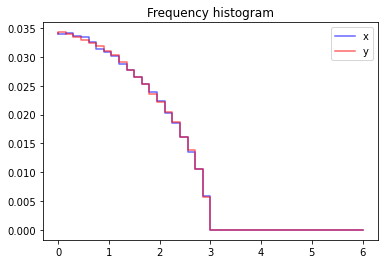

In [4]:
#building hist
K = 40
d = (b - a) / K
# Отрезки, на которых считаются частоты(x на графике)
di_l = [i * d for i in range(K + 1)]

def draw_plot(l, **kwargs):
    v_l = [
        len(list(filter(lambda v: di - d <= v < di, l))) / N
        for di in di_l
    ]
    plt.plot(di_l, v_l, drawstyle='steps-pre', alpha=0.6, **kwargs)


draw_plot(x_l, label='x', color='b')
draw_plot(y_l, label='y', color='r')

plt.title(f'Frequency histogram')
plt.legend()
plt.show()

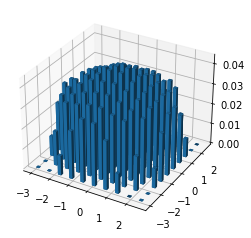

In [5]:
#simple dop

x, y = list(zip(*tuple(zip(x_l, y_l))))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, x_edges, y_edges = np.histogram2d(x, y, range=[[a, b], [a, b]], density=True)
x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
dx = dy = 0.17 * np.ones_like(0)
dz = hist.ravel()
ax.bar3d(x_pos, y_pos, 0, dx, dy, dz, shade=True)
#ax.set_title('title')
plt.show()